# Sheep Classifier using PyTorch/fastai

Training a Computer Vision Classifier using `fastai` and achieving state of the art results is quite easy!

In [1]:
from fastai.vision.all import *
import pathlib

## The Data
Setting up the `path` object

In [2]:
path = pathlib.Path("/kaggle/input/sheep-breed-classification/SheepFaceImages")
Path.BASE_PATH = path
path.ls()

(#4) [Path('Marino'),Path('Suffolk'),Path('Poll Dorset'),Path('White Suffolk')]

Taking a look at an example

(<Axes: >, (181, 156))

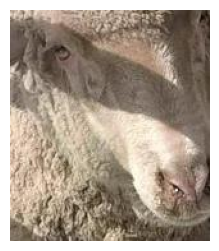

In [3]:
files = get_image_files(path)
img0 = PILImage(PILImage.create(files[0]))
img0.show(figsize=(9,3)), img0.shape

## Training our model
First, we define our `dataloaders`

In [4]:
sheeps = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter=RandomSplitter(seed=12),
                   get_y = parent_label,
                   item_tfms = Resize(150),
                   batch_tfms=aug_transforms(size=112, min_scale=0.75, mult=1.5)) # applying some augmentations
dls = sheeps.dataloaders(path)

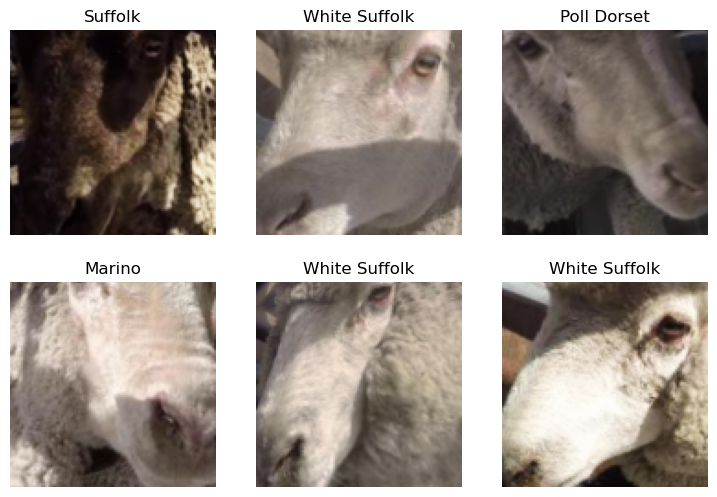

In [5]:
dls.show_batch(nrows=2, ncols=3)

Finding the best Learning Rate using the`lr_find` method, which leverages Lelie Smith's technique

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 94.2MB/s]


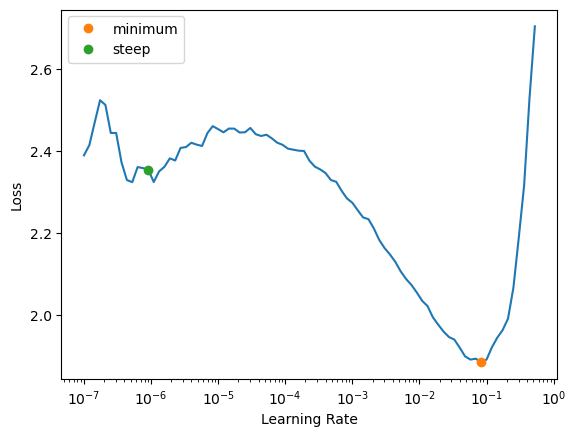

In [6]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [7]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 9.12e-07


In [8]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.938806,1.208967,0.622024,00:06
1,1.590360,0.730942,0.747024,00:06
2,1.306729,0.618011,0.767857,00:06


SuggestedLRs(valley=0.00013182566908653826)

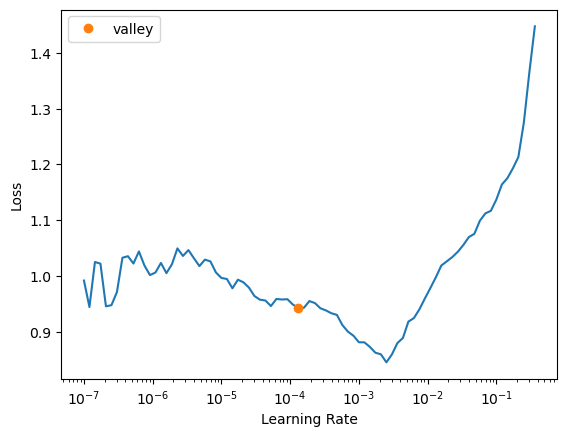

In [9]:
learn.unfreeze()
learn.lr_find()

In [10]:
learn.fit_one_cycle(12, lr_max=slice(3e-4,9e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.931387,0.553768,0.842262,00:06
1,0.803950,0.733429,0.803571,00:06
2,0.689951,0.575220,0.821429,00:06
3,0.541802,0.263808,0.940476,00:06
4,0.433031,0.241800,0.925595,00:06
5,0.348835,0.256118,0.922619,00:06
6,0.296479,0.563315,0.830357,00:06
7,0.243167,0.086300,0.970238,00:06
8,0.189147,0.117264,0.967262,00:06
9,0.144977,0.107670,0.976190,00:06


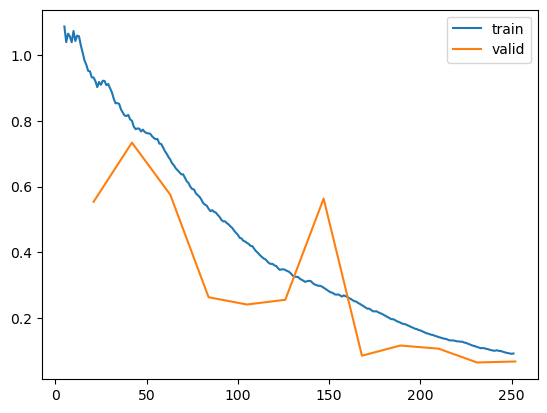

In [11]:
learn.recorder.plot_loss()

This simple model has ~98% accuracy on the validation set. That result is more than acceptable, so we'll leave this model like that. This exercise shows just how easy it is to implement a state of the art classification model using `fastai`.